In [1]:
#Initial Setup for plots etc

#!pip install plotnine
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random
import warnings
from scipy import stats
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind
from scipy.stats import shapiro
import pandas as pd
import seaborn as sns
import plotnine as p9
import glob
import os

from BSE import market_session
from BSE import Trader_PRZI_SHC




def plot_distribution(i):
    plt.figure()
    ax=sns.distplot(i)
    plt.axvline(np.mean(i),color="k",linestyle="dashed",linewidth=4)
    _,max_=plt.ylim()
    plt.text(i.mean()+(i.mean()/10),max_- max_ / 10, "Mean :{:.2f}".format(i.mean()))
    return plt.figure

def plot_trades(trial_id):
    prices_fname = trial_id + '_transactions.csv'
    x = np.empty(0)
    y = np.empty(0)
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time = float(row[1])
            price = float(row[2])
            x = np.append(x,time)
            y = np.append(y,price)

    plt.plot(x, y, 'x', color='black') 
    plt.xlabel('Time is (secs)')
    plt.ylabel('Price')
    
# Use this to run an experiment n times and plot all trades
def n_runs_plot(n, trial_id, start_time, end_time, traders_spec, order_sched):
    x = np.empty(0)
    y = np.empty(0)

    for i in range(n):
        trialId = trial_id + '_' + str(i)
        tdump = open(trialId + '_avg_balance.csv','w')

        market_session(trialId, start_time, end_time, traders_spec, order_sched, tdump, True, False)
        
        tdump.close()

        with open(trialId + '_transactions.csv', newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                time = float(row[1])
                price = float(row[2])
                x = np.append(x,time)
                y = np.append(y,price)

    plt.plot(x, y, 'x', color='black')
    plt.xlabel('Time')
    plt.ylabel('Price');

# !!! Don't use on it's own   
def getorderprice(i, sched, n, mode):
    pmin = min(sched[0][0], sched[0][1])
    pmax = max(sched[0][0], sched[0][1])
    prange = pmax - pmin
    stepsize = prange / (n - 1)
    halfstep = round(stepsize / 2.0)

    if mode == 'fixed':
        orderprice = pmin + int(i * stepsize)
    elif mode == 'jittered':
        orderprice = pmin + int(i * stepsize) + random.randint(-halfstep, halfstep)
    elif mode == 'random':
        if len(sched) > 1:
            # more than one schedule: choose one equiprobably
            s = random.randint(0, len(sched) - 1)
            pmin = min(sched[s][0], sched[s][1])
            pmax = max(sched[s][0], sched[s][1])
        orderprice = random.randint(pmin, pmax)
    return orderprice    

# !!! Don't use on it's own
def make_supply_demand_plot(bids, asks):
    # total volume up to current order
    volS = 0
    volB = 0

    fig, ax = plt.subplots()
    plt.ylabel('Price')
    plt.xlabel('Quantity')
    
    pr = 0
    for b in bids:
        if pr != 0:
            # vertical line
            ax.plot([volB,volB], [pr,b], 'r-')
        # horizontal lines
        line, = ax.plot([volB,volB+1], [b,b], 'r-')
        volB += 1
        pr = b
    if bids:
        line.set_label('Demand')
        
    pr = 0
    for s in asks:
        if pr != 0:
            # vertical line
            ax.plot([volS,volS], [pr,s], 'b-')
        # horizontal lines
        line, = ax.plot([volS,volS+1], [s,s], 'b-')
        volS += 1
        pr = s
    if asks:
        line.set_label('Supply')
        
    if bids or asks:
        plt.legend()
    plt.show()

# Use this to plot supply and demand curves from supply and demand ranges and stepmode
def sup_dem(seller_num, sup_ranges, buyer_num, dem_ranges, stepmode):
    asks = []
    for s in range(seller_num):
        asks.append(getorderprice(s, sup_ranges, seller_num, stepmode))
    asks.sort()
    bids = []
    for b in range(buyer_num):
        bids.append(getorderprice(b, dem_ranges, buyer_num, stepmode))
    bids.sort()
    bids.reverse()
    
    make_supply_demand_plot(bids, asks) 

# plot sorted trades, useful is some situations - won't be used in this worksheet
def in_order_plot(trial_id):
    prices_fname = trial_id + '_transactions.csv'
    y = np.empty(0)
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            price = float(row[2])
            y = np.append(y,price)
    y = np.sort(y)
    x = list(range(len(y)))

    plt.plot(x, y, 'x', color='black')   

In [2]:
start_time = 0
end_time = 60 * 60

In [3]:
sup_range=(100,200)
dem_range=(100,200)

supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [sup_range], 'stepmode': 'fixed'}]
demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [dem_range], 'stepmode': 'fixed'}]

In [4]:
sellers_spec = [("PRSH",10),("PRSHN",10)]
buyers_spec = [("PRSH",10),("PRSHN",10)]
traders_spec ={"sellers" : sellers_spec, "buyers": buyers_spec}

In [5]:
order_interval = 60
order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
               'interval': order_interval, 'timemode': 'periodic'}

In [6]:
verbose = True
#tdump=open('Test_avg_balance.csv','w')
trial_id = 'Test'
dump_all = True
#market_session(trial_id, start_time, end_time, traders_spec, order_sched, tdump, dump_all, verbose)
#tdump.close()

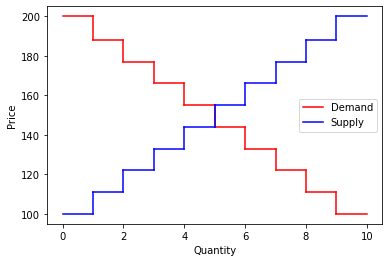

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=-0.378631, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.459028, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.325443, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.287905, start=0.000000, $=0.000000, pps=0.000000


4
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=-0.615780, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.687105, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.545066, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.499715, start=0.000000, $=0.000000, pps=0.000000


4
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=-0.192600, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.230935, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.145447, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.198384, start=0.000000, $=0.000000, pps=0.000000


4
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=-0.821179, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.925846, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.7939

t=300.000000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.075000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.125000 B00 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.125000 B04 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.125000 B08 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.125000 B09 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.125000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.125000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.125000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.125000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.125000 B17 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.125000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=300.075000 B00 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B05 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B06 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B08 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B09 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B11 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B12 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B13 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B18 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B19 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.0750

t=1500.125000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.225000 B00 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.225000 B05 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.225000 B06 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.225000 B08 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.225000 B09 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.225000 B11 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.225000 B12 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.225000 B13 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.225000 B18 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.225000 B19 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1


t=300.025000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B08 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B10 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B16 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B17 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.0250

t=1500.200000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B08 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B10 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B16 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B17 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=2700.275000 B05 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B08 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B10 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B13 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B14 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B15 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B16 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B17 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B18 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B19 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1


t=300.025000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B07 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B08 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B09 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B10 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B11 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B17 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.0250

t=1500.100000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.125000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.175000 B01 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.175000 B02 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.175000 B03 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.175000 B06 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.175000 B08 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.175000 B11 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.175000 B12 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.175000 B14 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.175000 B15 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.175000 B19 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1


t=2700.200000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.025000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B02 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B04 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B10 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B11 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B16 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.0250

t=1500.125000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.125000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.125000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.125000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.025000 B00 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B09 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B11 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B16 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.0250

t=1500.125000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.150000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.100000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.150000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.025000 B00 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B02 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B04 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B07 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B10 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B11 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B16 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B17 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.0250

t=1500.100000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.100000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.025000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B02 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B09 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B11 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.0250

t=1500.125000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.250000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.250000 B02 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.250000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.250000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.250000 B09 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.250000 B11 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.250000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.250000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.250000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.250000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.125000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B02 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B08 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B09 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B10 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=2700.125000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.100000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.200000 B01 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.200000 B03 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.200000 B05 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.200000 B10 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.200000 B13 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.200000 B14 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.200000 B16 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.200000 B17 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.200000 B18 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.200000 B19 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1


t=300.000000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.100000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.250000 B03 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.250000 B04 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.250000 B06 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.250000 B07 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.250000 B09 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.250000 B10 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.250000 B12 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.250000 B14 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.250000 B16 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.250000 B18 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1


t=300.050000 B00 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B02 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B11 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B12 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B13 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B15 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B16 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B17 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B18 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B19 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.0500

t=1500.100000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.225000 B00 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.225000 B02 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.225000 B11 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.225000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.225000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.225000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.225000 B16 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.225000 B17 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.225000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.225000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=300.000000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.150000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.175000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.100000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.225000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.050000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.100000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.025000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B02 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B07 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B08 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B11 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.0250

t=1500.125000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.150000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.075000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.100000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.025000 B00 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B04 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B08 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B09 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.0250

t=1500.175000 B00 PRSH respond: strat[0] elapsed=300.100000; wait_t=300.000000, switched to strat=1
t=1500.175000 B03 PRSH respond: strat[0] elapsed=300.100000; wait_t=300.000000, switched to strat=1
t=1500.175000 B04 PRSH respond: strat[0] elapsed=300.100000; wait_t=300.000000, switched to strat=1
t=1500.175000 B05 PRSH respond: strat[0] elapsed=300.100000; wait_t=300.000000, switched to strat=1
t=1500.175000 B08 PRSH respond: strat[0] elapsed=300.100000; wait_t=300.000000, switched to strat=1
t=1500.175000 B09 PRSH respond: strat[0] elapsed=300.100000; wait_t=300.000000, switched to strat=1
t=1500.175000 B12 PRSH respond: strat[0] elapsed=300.100000; wait_t=300.000000, switched to strat=1
t=1500.175000 B15 PRSH respond: strat[0] elapsed=300.100000; wait_t=300.000000, switched to strat=1
t=1500.175000 B18 PRSH respond: strat[0] elapsed=300.100000; wait_t=300.000000, switched to strat=1
t=1500.175000 B19 PRSH respond: strat[0] elapsed=300.100000; wait_t=300.000000, switched to strat=1


t=2700.225000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.025000 B00 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B09 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B17 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.0250

t=1500.225000 B00 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B09 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B17 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=2700.300000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.300000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.300000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.300000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.300000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.300000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.300000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.300000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.300000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.300000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.125000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B02 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B04 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B10 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=2700.175000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.175000 B02 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.175000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.175000 B04 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.175000 B10 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.175000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.175000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.175000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.175000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.175000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=300.000000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.125000 B00 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.125000 B01 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.125000 B03 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.125000 B08 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.125000 B12 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.125000 B13 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.125000 B14 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.125000 B15 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.125000 B16 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.125000 B17 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1


t=2700.225000 B00 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.225000 B01 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.225000 B03 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.225000 B08 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.225000 B12 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.225000 B13 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.225000 B14 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.225000 B15 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.225000 B16 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.225000 B17 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1


t=300.000000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.125000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.225000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.150000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.150000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.175000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.050000 B03 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B06 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B07 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B09 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B10 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B12 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B13 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B15 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B17 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B18 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.0500

t=1500.250000 B03 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.250000 B06 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.250000 B07 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.250000 B09 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.250000 B10 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.250000 B12 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.250000 B13 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.250000 B15 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.250000 B17 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.250000 B18 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1


t=2700.325000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.325000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.325000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.325000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.325000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.325000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.325000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.325000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.325000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.325000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.025000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B07 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B08 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B16 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B17 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.0250

t=1500.100000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.100000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.100000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.100000 B01 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.100000 B02 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.100000 B03 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.100000 B04 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.100000 B05 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.100000 B07 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.100000 B08 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.100000 B09 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.100000 B10 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.100000 B13 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1


t=2700.175000 B01 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.175000 B02 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.175000 B03 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.175000 B04 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.175000 B05 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.175000 B07 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.175000 B08 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.175000 B09 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.175000 B10 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.175000 B13 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1


t=300.125000 B02 PRSH respond: strat[0] elapsed=300.125000; wait_t=300.000000, switched to strat=1
t=300.125000 B03 PRSH respond: strat[0] elapsed=300.125000; wait_t=300.000000, switched to strat=1
t=300.125000 B05 PRSH respond: strat[0] elapsed=300.125000; wait_t=300.000000, switched to strat=1
t=300.125000 B07 PRSH respond: strat[0] elapsed=300.125000; wait_t=300.000000, switched to strat=1
t=300.125000 B10 PRSH respond: strat[0] elapsed=300.125000; wait_t=300.000000, switched to strat=1
t=300.125000 B12 PRSH respond: strat[0] elapsed=300.125000; wait_t=300.000000, switched to strat=1
t=300.125000 B15 PRSH respond: strat[0] elapsed=300.125000; wait_t=300.000000, switched to strat=1
t=300.125000 B17 PRSH respond: strat[0] elapsed=300.125000; wait_t=300.000000, switched to strat=1
t=300.125000 B18 PRSH respond: strat[0] elapsed=300.125000; wait_t=300.000000, switched to strat=1
t=300.125000 B19 PRSH respond: strat[0] elapsed=300.125000; wait_t=300.000000, switched to strat=1
t=300.1250

t=1500.175000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.175000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.025000 B00 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B04 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B08 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B09 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B11 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.0250

t=1500.175000 B00 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B04 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B08 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B09 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B11 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=2700.175000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.150000 B02 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B03 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B05 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B09 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B10 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B15 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B16 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B17 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B18 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B19 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1


t=2700.225000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.050000 B01 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B03 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B04 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B05 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B06 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B07 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B08 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B11 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B15 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B19 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.0500

t=1500.100000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.150000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.150000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.150000 B04 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.150000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.150000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.150000 B07 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.150000 B08 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.150000 B11 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.150000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.150000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=300.000000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.125000 B00 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B02 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B04 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B10 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B11 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B16 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=2700.150000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.175000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.175000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.200000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.200000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.100000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.100000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.125000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.050000 B00 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B01 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B04 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B08 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B09 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B11 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B12 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B16 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B17 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B19 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.0500

t=1500.125000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.125000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.150000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.150000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.175000 B00 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B02 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B07 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B09 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B11 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.175000 B17 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=2700.225000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.075000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.100000 B00 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.100000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.100000 B04 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.100000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.100000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.100000 B07 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.100000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.100000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.100000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.100000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.050000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.125000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.075000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.075000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.275000 B01 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B02 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B04 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B05 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B08 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B11 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B12 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B13 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B18 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B19 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1


t=300.050000 B04 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B05 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B07 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B08 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B09 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B10 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B13 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B15 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B17 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B18 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.0500

t=1500.200000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.275000 B04 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B05 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B07 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B08 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B09 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B10 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B13 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B15 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B17 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=2700.275000 B18 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1


t=300.075000 B01 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B04 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B06 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B07 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B09 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B10 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B11 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B12 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B16 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.075000 B18 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=300.0750

t=1500.200000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B04 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B07 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B09 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B10 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B11 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B16 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.200000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=2700.275000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.275000 B04 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.275000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.275000 B07 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.275000 B09 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.275000 B10 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.275000 B11 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.275000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.275000 B16 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.275000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B19 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.100000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.100000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.100000 B07 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.100000 B08 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.100000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.100000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.100000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.100000 B16 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.100000 B17 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.100000 B19 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=2700.175000 B05 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.175000 B06 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.175000 B07 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.175000 B08 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.175000 B13 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.175000 B14 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.175000 B15 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.175000 B16 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.175000 B17 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1
t=2700.175000 B19 PRSH respond: strat[0] elapsed=300.075000; wait_t=300.000000, switched to strat=1


t=300.050000 B01 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B04 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B05 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B06 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B08 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B09 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B10 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B11 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B12 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B15 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.0500

t=1500.200000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.200000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.225000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B08 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.025000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B02 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B09 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.025000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=300.0250

t=1500.150000 B01 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B02 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B03 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B06 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B09 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B12 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B13 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B14 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B15 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=1500.150000 B18 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1


t=2700.175000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.175000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B18 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.075000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.075000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.075000 B04 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.075000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.075000 B10 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.075000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.075000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.075000 B16 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.075000 B17 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.075000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=2700.200000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.200000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.200000 B04 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.200000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.200000 B10 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.200000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.200000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.200000 B16 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.200000 B17 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=2700.200000 B18 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.225000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B07 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B09 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B11 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.225000 B15 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=2700.225000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B09 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.225000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.050000 B01 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B02 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B03 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B04 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B05 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B06 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B12 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B13 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B14 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.050000 B16 PRSH respond: strat[0] elapsed=300.050000; wait_t=300.000000, switched to strat=1
t=300.0500

t=1500.125000 B01 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B02 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B03 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B04 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B05 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B06 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B12 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B13 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B14 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1
t=1500.125000 B16 PRSH respond: strat[0] elapsed=300.025000; wait_t=300.000000, switched to strat=1


t=2700.125000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B02 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B03 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B06 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B12 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B13 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B14 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.125000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=300.000000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.000000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=300.0000

t=1500.050000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=1500.050000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


t=2700.075000 B00 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.075000 B01 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.075000 B04 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.075000 B05 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.075000 B07 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.075000 B10 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.075000 B11 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.075000 B15 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.075000 B16 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1
t=2700.075000 B17 PRSH respond: strat[0] elapsed=300.000000; wait_t=300.000000, switched to strat=1


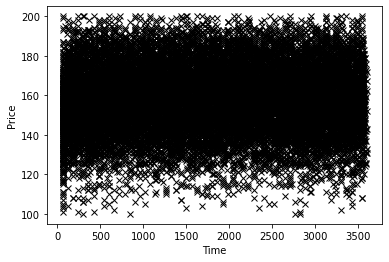

In [7]:
sup_dem(10, [sup_range], 10, [dem_range], 'fixed')
#plot_trades('Test')
n_runs_plot(50, trial_id, start_time, end_time, traders_spec, order_sched)

In [8]:
# merging the files
joined_files = os.path.join("", "Test_*_avg_balance.csv")
  
# A list of all joined files is returned
joined_list = glob.glob(joined_files)


columns=["Trial_id","Time elapsed","Buy","Sell","Trading Algorithm PRSH",
           "Total Profit for PRSH","Total Traders PRSH","Average Profit PRSH","Trading Algorithm PRSHN",
           "Total Profit for PRSHN","Total Traders ZIP","Average Profit PRSHN","Buy1","Sell1"]

dfcol=[]
for i,file_name in enumerate(joined_list):
    df1=pd.read_csv(file_name,names=columns,index_col=False)
    dfcol.append(df1)
df = pd.concat(dfcol)

#print(df.head())

In [9]:
#Tests for Normality (Shapiro-Wilk Test)
from scipy.stats import shapiro
shapiro=shapiro(df['Average Profit PRSH'])
print(shapiro)

ShapiroResult(statistic=0.964982271194458, pvalue=0.0)


C:\Users\jh21478\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.


In [10]:
mannwhitneyu(df['Average Profit PRSH'],df['Average Profit PRSHN'])
#wilcoxon(df['Average Profit TA1'],df['Average Profit TA2'])

MannwhitneyuResult(statistic=209807191.0, pvalue=1.0780413786835227e-32)

C:\Users\jh21478\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

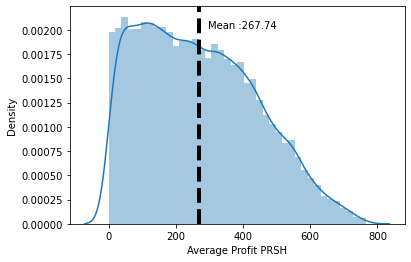

In [11]:
plot_distribution(df['Average Profit PRSH'])

In [12]:
#Rearranging the data for plotting
df1=pd.concat([df["Trading Algorithm PRSH"],df["Trading Algorithm PRSHN"]],axis=0)
df2=pd.concat([df["Average Profit PRSH"],df["Average Profit PRSHN"]],axis=0)
df3=pd.concat([df1,df2],axis=1)
df3.columns=["Trading Algorithm","Average Profit Per Trader"]
#print (df3)

C:\Users\jh21478\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

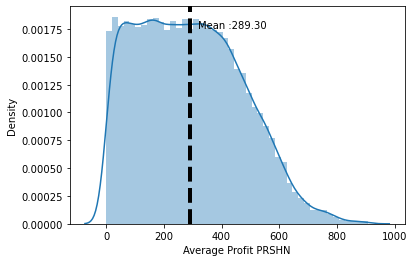

In [13]:
#Distribution of the PRSHN data
plot_distribution(df['Average Profit PRSHN'])

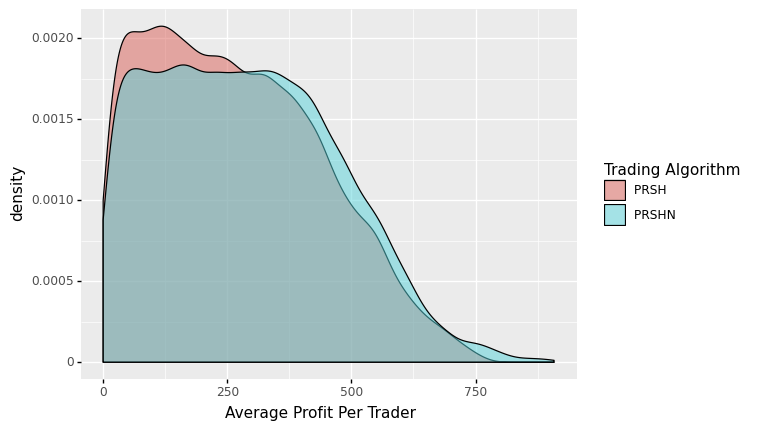

<ggplot: (164514796039)>

In [14]:
p9.ggplot(df3)+ p9.aes(x='Average Profit Per Trader', fill='Trading Algorithm') + p9.geom_density(alpha=0.5)

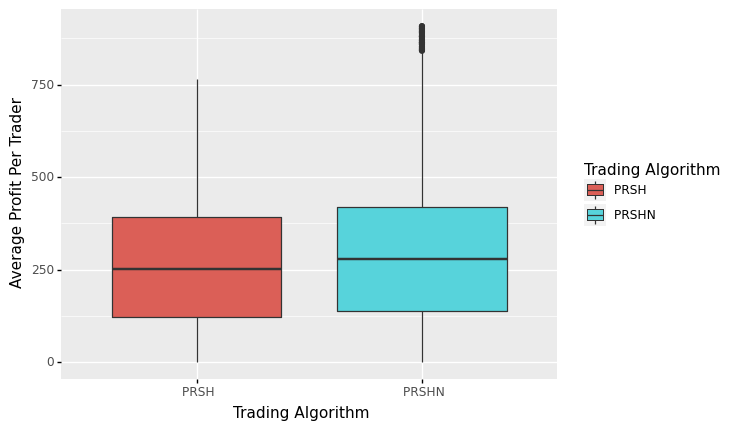

<ggplot: (164515539987)>

In [15]:
(p9.ggplot(df3)+ p9.aes(x='Trading Algorithm',y='Average Profit Per Trader', fill='Trading Algorithm')+ p9.geom_boxplot())